In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
Churn_V1 = pd.read_csv('/Users/niharrk/Desktop/UTD/Spring 23/Predictive/Churn_telecom (1).csv')

In [3]:
print(Churn_V1.head())

   rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  rev_Range  ...  kid0_2  kid3_5  \
0          0.0          0.0        0.0      25.99  ...       U       U   
1          9.1          0.0        0.0     153.14  ...       U       U   
2          0.0          0.0        0.0       0.00  ...       U       Y   
3          0.0          0.0        0.0       0.00  ...       Y       U   
4          0.0          0.0        0.0       0.00  ...       U       U   

   kid6_10  kid11_15  kid16_17  creditcd  car_buy  retdays  eqpdays  \
0        U         U         U         Y     

In [14]:
# Calculate the means of each variable for churn values 1 and 0
churn_means = Churn_V1.groupby('churn').mean()

# Calculate the percentage differences between the means for each variable
churn_pct_diff = abs((churn_means.loc[1] - churn_means.loc[0]) / churn_means.loc[0]) * 100

# Sort the DataFrame by the percentage differences in descending order
churn_pct_diff_sorted = churn_pct_diff.sort_values(ascending=False)

# Select the top 10 columns with highest percentage difference
top_10_columns = churn_pct_diff_sorted.nlargest(10).index.tolist()

# Add 'churn' column to the list of top 10 columns
top_10_columns.append('churn')

# Create a new DataFrame with only the top 10 columns
Churn_V2_top_10 = Churn_V1[top_10_columns]

# Display the resulting DataFrame
print(Churn_V2_top_10)

       change_mou  change_rev  blck_dat_Mean  blck_dat_Range  retdays  \
0         -157.25    -18.9975            0.0               0     23.0   
1          532.25     50.9875            0.0               0      NaN   
2           -4.25      0.0000            0.0               0      NaN   
3           -1.50      0.0000            0.0               0      NaN   
4           38.50      0.0000            0.0               0      NaN   
...           ...         ...            ...             ...      ...   
99995         NaN         NaN            0.0               0      NaN   
99996         NaN         NaN            0.0               0      NaN   
99997         NaN         NaN            0.0               0      NaN   
99998         NaN         NaN            0.0               0     77.0   
99999         NaN         NaN            0.0               0      NaN   

       roam_Mean  drop_dat_Mean  mou_opkd_Mean  roam_Range  rmrev  churn  
0            0.0            0.0            0.0  

In [15]:
# Calculate the percentage of missing values in each column
missing_values_pct = (Churn_V2_top_10.isna().mean() * 100).round(2)

# Display the resulting Series
print(missing_values_pct)

change_mou         0.89
change_rev         0.89
blck_dat_Mean      0.00
blck_dat_Range     0.00
retdays           96.02
roam_Mean          0.36
drop_dat_Mean      0.00
mou_opkd_Mean      0.00
roam_Range         0.36
rmrev             85.78
churn              0.00
dtype: float64


In [19]:
# Drop columns where missing values are over 10%
Churn_V3_missing_values = Churn_V2_top_10.drop(columns=['retdays', 'rmrev'])

In [20]:
# Drop rows with missing values
Churn_V4_dropped_missing_values = Churn_V3_missing_values.dropna()

# Display the resulting DataFrame
print(Churn_V4_dropped_missing_values)

       change_mou  change_rev  blck_dat_Mean  blck_dat_Range  roam_Mean  \
0     -157.250000  -18.997500            0.0               0       0.00   
1      532.250000   50.987500            0.0               0       0.00   
2       -4.250000    0.000000            0.0               0       0.00   
3       -1.500000    0.000000            0.0               0       0.00   
4       38.500000    0.000000            0.0               0       0.00   
...           ...         ...            ...             ...        ...   
99981   -6.333333    0.000000            0.0               0       0.00   
99984    0.000000    0.000000            0.0               0       0.39   
99985  -40.000000   -1.993333            0.0               0       0.91   
99986    0.000000    0.000000            0.0               0       0.00   
99993  122.000000   15.940000            0.0               0       4.69   

       drop_dat_Mean  mou_opkd_Mean  roam_Range  churn  
0                0.0       0.000000       

In [21]:
# Print the data type of each column
print(Churn_V4_dropped_missing_values.dtypes)

change_mou        float64
change_rev        float64
blck_dat_Mean     float64
blck_dat_Range      int64
roam_Mean         float64
drop_dat_Mean     float64
mou_opkd_Mean     float64
roam_Range        float64
churn               int64
dtype: object


                change_mou  change_rev  blck_dat_Mean  blck_dat_Range  \
change_mou        1.000000    0.673922       0.004327        0.002211   
change_rev        0.673922    1.000000       0.003467        0.002083   
blck_dat_Mean     0.004327    0.003467       1.000000        0.959999   
blck_dat_Range    0.002211    0.002083       0.959999        1.000000   
roam_Mean         0.257873    0.456629       0.000452        0.000579   
drop_dat_Mean    -0.014426   -0.010474       0.075329        0.080704   
mou_opkd_Mean    -0.014059   -0.008031       0.067204        0.072767   
roam_Range        0.275107    0.484458       0.000323        0.000435   
churn            -0.031536    0.007832      -0.003963       -0.004041   

                roam_Mean  drop_dat_Mean  mou_opkd_Mean  roam_Range     churn  
change_mou       0.257873      -0.014426      -0.014059    0.275107 -0.031536  
change_rev       0.456629      -0.010474      -0.008031    0.484458  0.007832  
blck_dat_Mean    0.000452    

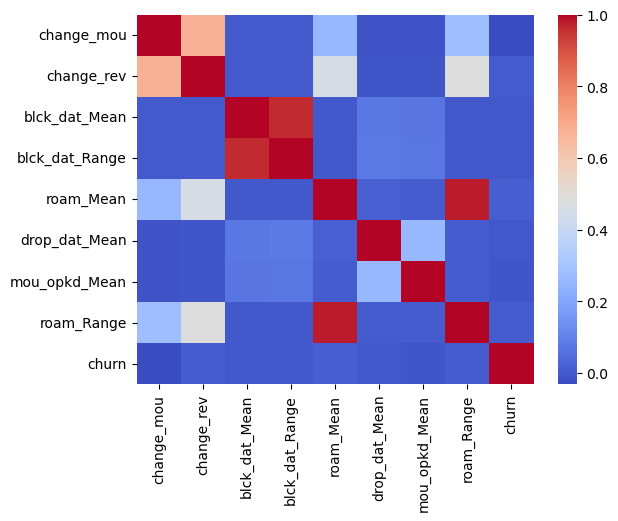

In [22]:
# Calculate the correlation between columns
corr_matrix = Churn_V4_dropped_missing_values.corr()

# Display the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

In [23]:
# Drop columns where missing values are over 10%
Churn_V5_dropped_highly_correlated_values = Churn_V4_dropped_missing_values.drop(columns=['blck_dat_Range', 'roam_Range'])

               change_mou  change_rev  blck_dat_Mean  roam_Mean  \
change_mou       1.000000    0.673922       0.004327   0.257873   
change_rev       0.673922    1.000000       0.003467   0.456629   
blck_dat_Mean    0.004327    0.003467       1.000000   0.000452   
roam_Mean        0.257873    0.456629       0.000452   1.000000   
drop_dat_Mean   -0.014426   -0.010474       0.075329   0.016770   
mou_opkd_Mean   -0.014059   -0.008031       0.067204   0.006361   
churn           -0.031536    0.007832      -0.003963   0.009178   

               drop_dat_Mean  mou_opkd_Mean     churn  
change_mou         -0.014426      -0.014059 -0.031536  
change_rev         -0.010474      -0.008031  0.007832  
blck_dat_Mean       0.075329       0.067204 -0.003963  
roam_Mean           0.016770       0.006361  0.009178  
drop_dat_Mean       1.000000       0.259751 -0.006147  
mou_opkd_Mean       0.259751       1.000000 -0.008177  
churn              -0.006147      -0.008177  1.000000  


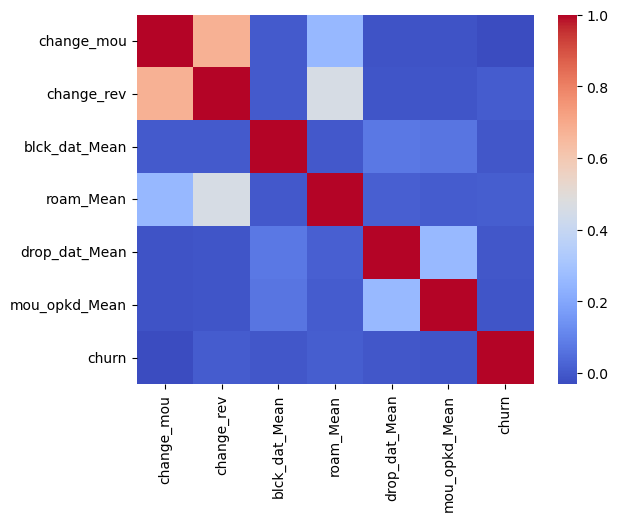

In [24]:
# Calculate the correlation between columns
corr_matrix = Churn_V5_dropped_highly_correlated_values.corr()

# Display the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

In [30]:
# select only the categorical variables
categorical_vars = Churn_V1.select_dtypes(include=['object'])

In [33]:

# Define the variable you want to test against
target_variable = 'churn'

# Define an empty dictionary to store the chi-squared statistics
chi_squared = {}

# Loop over every categorical variable in the DataFrame
for col in Churn_V1.select_dtypes(include='object'):
    if col != target_variable:
        # Create a contingency table for the two variables
        contingency_table = pd.crosstab(Churn_V1[target_variable], Churn_V1[col])
        # Calculate the chi-squared statistic and p-value
        stat, p, dof, expected = chi2_contingency(contingency_table)
        # Store the chi-squared statistic in the dictionary
        chi_squared[col] = stat

# Sort the dictionary by the chi-squared statistics (from strongest to weakest)
sorted_chi_squared = {k: v for k, v in sorted(chi_squared.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted dictionary
print(sorted_chi_squared)


{'last_swap': 1833.940549310236, 'csa': 1417.066599151187, 'crclscod': 660.7057260093538, 'asl_flag': 482.2532495428144, 'ethnic': 420.3062737763596, 'hnd_webcap': 411.9017113437383, 'dualband': 291.11527824324804, 'area': 269.5240412582466, 'refurb_new': 100.84139946217948, 'marital': 81.03961224933553, 'prizm_social_one': 43.82059133738768, 'occu1': 37.31727783658784, 'children': 27.75524626730906, 'creditcd': 27.655959609714298, 'infobase': 21.92807610155147, 'cartype': 18.9688309945827, 'dwllsize': 18.132763418558103, 'dwlltype': 11.952543626738425, 'HHstatin': 11.658234779499912, 'car_buy': 11.615168624090115, 'div_type': 9.820640054843768, 'kid0_2': 9.160101043445394, 'ownrent': 7.962375855239404, 'proptype': 4.542469937290991, 'new_cell': 2.7274928536276066, 'kid3_5': 2.118469954490835, 'kid16_17': 1.7262636326509355, 'kid11_15': 1.174359025051106, 'kid6_10': 0.42496831179883193, 'mailflag': 0.23291174739784526, 'solflag': 0.03013343809235916, 'mailordr': 0.0, 'wrkwoman': 0.0, '

In [35]:
# create a new DataFrame that includes the 'churn' column
Churn_V1_cat = Churn_V1[['last_swap','csa','crclscod','asl_flag','ethnic','hnd_webcap','dualband','area','refurb_new','marital']]

In [37]:
# count the number of missing values in each column
missing_values = Churn_V1_cat.isnull().sum()

# print the result
print(missing_values)

last_swap     57278
csa              40
crclscod          0
asl_flag          0
ethnic         1732
hnd_webcap    10189
dualband          1
area             40
refurb_new        1
marital        1732
dtype: int64


In [38]:
# Drop columns where missing values are over 10%
Churn_V2_cat = Churn_V1_cat.drop(columns=['last_swap', 'hnd_webcap'])

<AxesSubplot:>

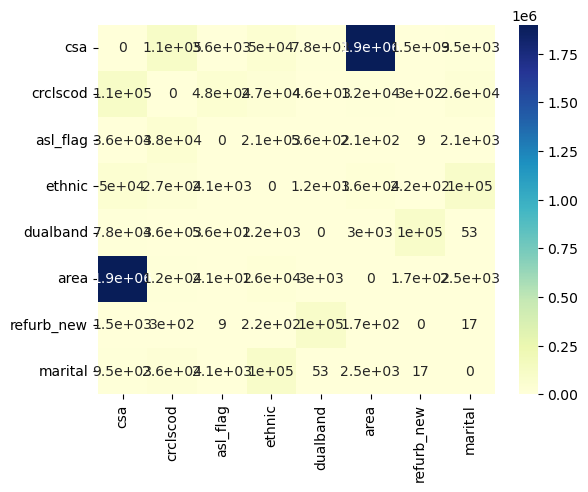

In [42]:
Churn_V2_cat = Churn_V2_cat.dropna()
# create a chi-squared test results table
chi_results = pd.DataFrame(index=Churn_V2_cat.columns, columns=Churn_V2_cat.columns)
for i in Churn_V2_cat.columns:
    for j in Churn_V2_cat.columns:
        if i == j:
            chi_results.loc[i, j] = 0.0
        else:
            contingency_table = pd.crosstab(Churn_V2_cat[i], Churn_V2_cat[j])
            chi_statistic, _, _, _ = chi2_contingency(contingency_table)
            chi_results.loc[i, j] = chi_statistic

# plot the heatmap of chi-squared test results using seaborn
sns.heatmap(chi_results.astype(float), annot=True, cmap="YlGnBu")

In [43]:
# Drop columns where missing values are over 10%
Churn_V3_cat = Churn_V2_cat.drop(columns=['area'])

In [44]:
print(Churn_V3_cat.columns)

Index(['csa', 'crclscod', 'asl_flag', 'ethnic', 'dualband', 'refurb_new',
       'marital'],
      dtype='object')


In [46]:
print(Churn_V5_dropped_highly_correlated_values.columns)

Index(['change_mou', 'change_rev', 'blck_dat_Mean', 'roam_Mean',
       'drop_dat_Mean', 'mou_opkd_Mean', 'churn'],
      dtype='object')


In [ ]:
# create a new DataFrame that includes the 'churn' column
Churn_V1_cat = Churn_V1[['last_swap','csa','crclscod','asl_flag','ethnic','hnd_webcap',
                         'dualband','area','refurb_new','marital']]

In [47]:
Churn_Final_V1=Churn_V1[['change_mou','change_rev','blck_dat_Mean','roam_Mean','drop_dat_Mean','mou_opkd_Mean',
                        'csa', 'crclscod', 'asl_flag', 'ethnic', 'dualband', 'refurb_new','marital','churn']]

In [48]:
# count the number of missing values in each column
missing_values = Churn_Final_V1.isnull().sum()

# print the result
print(missing_values)

change_mou        891
change_rev        891
blck_dat_Mean       0
roam_Mean         357
drop_dat_Mean       0
mou_opkd_Mean       0
csa                40
crclscod            0
asl_flag            0
ethnic           1732
dualband            1
refurb_new          1
marital          1732
churn               0
dtype: int64


In [49]:
Churn_Final_V1 = Churn_Final_V1.dropna()

In [50]:
# count the number of missing values in each column
missing_values = Churn_Final_V1.isnull().sum()

# print the result
print(missing_values)

change_mou       0
change_rev       0
blck_dat_Mean    0
roam_Mean        0
drop_dat_Mean    0
mou_opkd_Mean    0
csa              0
crclscod         0
asl_flag         0
ethnic           0
dualband         0
refurb_new       0
marital          0
churn            0
dtype: int64


In [51]:
print(len(Churn_Final_V1))

97351


In [57]:
Churn_Final_V1.to_csv('/Users/niharrk/Desktop/UTD/Spring 23/Predictive/Churn_Final_V1.csv', index=False)

In [56]:
# find unique values in the 'Name' column
unique_names = Churn_Final_V1['ethnic'].unique()

print(unique_names)

['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D' 'O' 'R' 'B' 'P' 'X' 'C']
